In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aryashah2k/credit-card-customer-data")

print("Path to dataset files:", path)

100%|██████████| 6.28k/6.28k [00:00<00:00, 7.78MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/aryashah2k/credit-card-customer-data/versions/2


In [5]:
df=pd.read_csv("/root/.cache/kagglehub/datasets/aryashah2k/credit-card-customer-data/versions/2/Credit Card Customer Data.csv")
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
x=df.drop(['Sl_No','Customer Key'],axis=1)
x.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [8]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)
x_scaled

array([[ 1.74018685, -1.24922476, -0.86045063, -0.54748969, -1.25153737],
       [ 0.41029254, -0.78758515, -1.47373077,  2.5205186 ,  1.89185881],
       [ 0.41029254,  1.05897329, -0.86045063,  0.13428993,  0.1455276 ],
       ...,
       [ 2.93709172,  1.5206129 , -0.86045063,  2.17962879, -0.90227113],
       [ 3.65523464,  2.44389211, -0.86045063,  4.22496765, -1.25153737],
       [ 3.52224521,  1.9822525 , -1.47373077,  3.20229822, -0.55300488]])

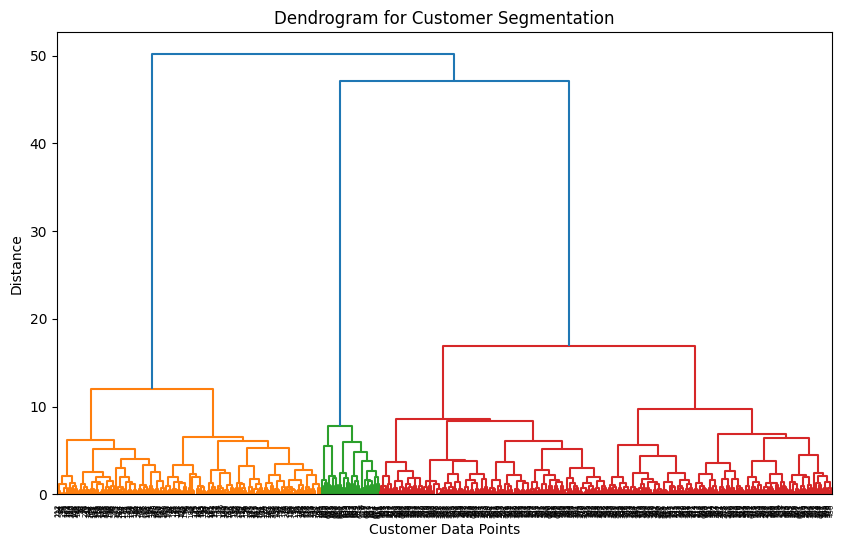

In [9]:
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(
    sch.linkage(x_scaled, method='ward')
)
plt.title("Dendrogram for Customer Segmentation")
plt.xlabel("Customer Data Points")
plt.ylabel("Distance")
plt.show()

In [10]:
hc = AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

y_clusters = hc.fit_predict(x_scaled)
y_clusters


array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
df['Cluster']=y_clusters
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Cluster
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,0
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,2


In [12]:
df.groupby('Cluster').mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,,,
0,417.862338,54895.745455,33851.948052,5.516883,3.493506,0.979221,1.994805
1,118.617778,55213.568889,12151.111111,2.422222,0.937778,3.546667,6.857778
2,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


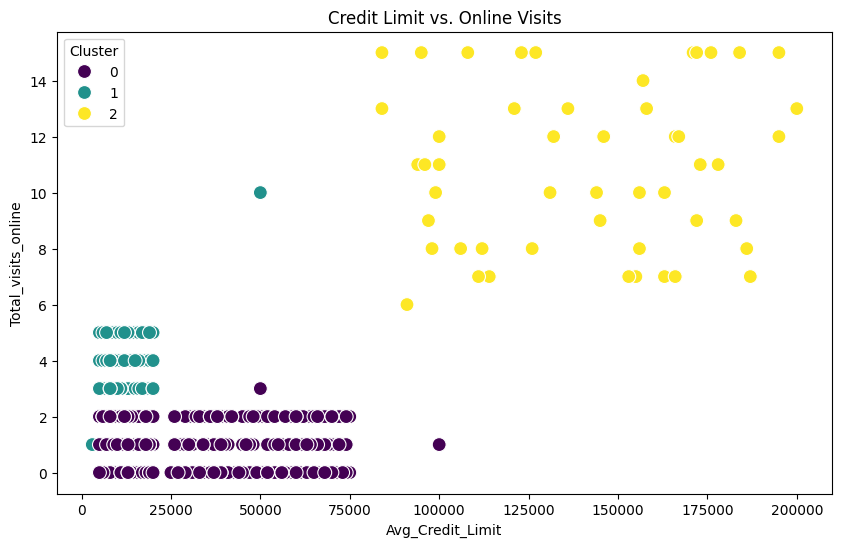

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df['Avg_Credit_Limit'],
    y=df['Total_visits_online'],
    hue=df['Cluster'],
    palette='viridis',  # Optional: makes colors distinct
    s=100               # Optional: makes dots bigger
)
plt.title("Credit Limit vs. Online Visits")
plt.show()

In [14]:
df.to_csv("clusters.csv", index=False)
print("file saved successfully")

file saved successfully


In [15]:
import pickle

# save model
with open("hierarchical_model.pkl", "wb") as file:
    pickle.dump(hc, file)


In [16]:
from google.colab import files
files.download("hierarchical_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>